In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [50]:
data = pd.read_excel('heart-dataset.xlsx')
df = data.copy()

In [51]:
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']

In [52]:
df['sexe'] = df['sexe'].replace({"homme":1,"femme":0})
df['type_douleur_thoracique'] = df['type_douleur_thoracique'].replace({'ASY':0,'DNA':1,'AA':2,'AT':3})
df['résultats_electrocardiogramme'] = df['résultats_electrocardiogramme'].replace({'Normal':0,'LVH':1,'ST':2})
df['angine'] = df['angine'].replace({'Oui':0,'Non':1})
df['pente_du_segment_ST_exercice'] = df['pente_du_segment_ST_exercice'].replace({'Plat':0,'Ascendant':1,'Descendant':2})
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,1,2,140,289,0,0,172,1,0.0,1,0
1,49,0,1,160,180,0,0,156,1,1.0,0,1
2,37,1,2,130,283,0,2,98,1,0.0,1,0
3,48,0,0,138,214,0,0,108,0,1.5,0,1
4,54,1,1,150,195,0,0,122,1,0.0,1,0


### 1er modele sans preprossessing

In [53]:
X = df.drop(columns= "presence_maladie_cardiaque" , axis = 1)
Y = df["presence_maladie_cardiaque"]

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (734, 11) (184, 11)


In [56]:
model = LogisticRegression(random_state=42)
model.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [57]:
Y_pred = model.predict(X_test)

In [58]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [59]:
conf_matrix = pd.DataFrame(confusion_matrix(Y_test,Y_pred), columns=['Absence','Présence'], index=['Absence','Présence'])
conf_matrix

,Absence,Présence
Absence,68,9
Présence,19,88


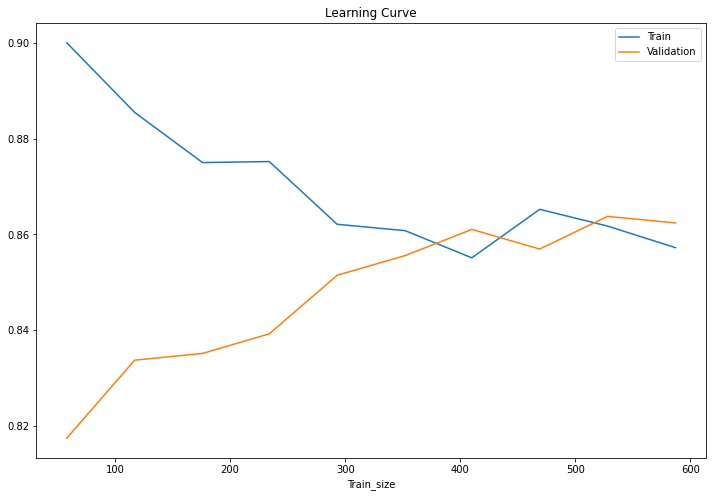

In [60]:
var, train_score, val_score = learning_curve(model,X_train, Y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Learning Curve')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()